# MILESTONE 1

## I. Introduction

Nama: Nurrahmawati

Batch: FTDS-002

Dataset: Credit Card Default

Object: Tujuan dari proyek kami adalah untuk memprediksi pelanggan mana yang mungkin gagal bayar di bulan-bulan mendatang.

### Objective

Risiko kredit memainkan peran utama dalam bisnis industri perbankan. Kegiatan utama bank meliputi pemberian pinjaman, kartu kredit, investasi, hipotek, dan lain-lain. Kartu kredit telah menjadi salah satu layanan keuangan yang paling booming oleh bank selama beberapa tahun terakhir. Namun, dengan meningkatnya jumlah pengguna kartu kredit, bank menghadapi tingkat default kartu kredit yang meningkat. Dengan demikian analisis data dapat memberikan solusi untuk mengatasi fenomena saat ini dan manajemen risiko kredit.

Tujuan dari proyek kami adalah untuk memprediksi pelanggan mana yang mungkin gagal bayar di bulan-bulan mendatang. Sebelum melangkah lebih jauh, mari kita lihat sekilas definisi apa yang sebenarnya dimaksud dengan wanprestasi Kartu Kredit.

Kita semua tahu apa itu kartu kredit. Ini adalah jenis kartu pembayaran di mana biaya dilakukan terhadap jalur kredit alih-alih setoran tunai pemegang akun. Saat seseorang menggunakan kartu kredit untuk melakukan pembelian, akun orang tersebut menghasilkan saldo yang harus dilunasi setiap bulan.

Gagal bayar kartu kredit terjadi ketika Anda menjadi tunggakan pembayaran kartu kredit Anda. Pembayaran kartu kredit yang hilang satu atau dua kali tidak dihitung sebagai default. Gagal bayar terjadi ketika Anda gagal membayar Jumlah Minimum Jatuh Tempo pada kartu kredit selama beberapa bulan berturut-turut.

Data extraction from Bigquery using Google Cloud Platform (Bigquery-public-data table credit_card_default based on dataset in ml_datasets ) 
```txt
SELECT limit_balance, 
      sex, 
      education_level, 
      marital_status, 
      age, 
      pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, 
      bill_amt_1, bill_amt_2, bill_amt_3, 
      bill_amt_4, bill_amt_5, bill_amt_6, 
      pay_amt_1, pay_amt_2, pay_amt_3, 
      pay_amt_4, pay_amt_5, pay_amt_6, 
      default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 3996
```

## II. Import Libraries

In [1]:
# Define Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# For Classifier Problems
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Evaluate Regression Models
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

# Error and Display settings
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

from time import time

## III. Data Loading

In [2]:
data = pd.read_csv('h8dsft_P1M1_Nurrahmawati.csv', skipinitialspace = True)
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,-1,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,-2,399,2430,0,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0


In [3]:
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,320000,1,2,1,41,1,-2,-2,-2,-2,-2,0,0,0,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,-1,628,662,596,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,0,13429,14502,15564,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,0,42856,29248,17775,17833,18246,18642,1300,1600,650,700,700,700,0
2964,100000,2,1,2,28,0,0,0,2,0,0,10886,11697,14479,10775,10998,12655,1300,3005,0,700,2000,1500,0


In [4]:
# Checking Basic Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Berdasarkan data informasi tersebut dapat diketahui bahwa tipe data ini adalah int64. Selain itu, dapat dilihat bahwa data ini mewakili semuanya dengan 2965 entri data yang dapat diartikan sebagai tidak ada nilai yang hilang

In [5]:
# Check Percentage Missing Values
data.isnull().mean()

limit_balance                 0.0
sex                           0.0
education_level               0.0
marital_status                0.0
age                           0.0
pay_0                         0.0
pay_2                         0.0
pay_3                         0.0
pay_4                         0.0
pay_5                         0.0
pay_6                         0.0
bill_amt_1                    0.0
bill_amt_2                    0.0
bill_amt_3                    0.0
bill_amt_4                    0.0
bill_amt_5                    0.0
bill_amt_6                    0.0
pay_amt_1                     0.0
pay_amt_2                     0.0
pay_amt_3                     0.0
pay_amt_4                     0.0
pay_amt_5                     0.0
pay_amt_6                     0.0
default_payment_next_month    0.0
dtype: float64

In [6]:
# Checking data duplicated
data[data.duplicated()].shape

(1, 24)

Ada satu data duplikat entri dan kami akan menghapusnya nanti di bagian pembersihan.

In [7]:
# Checking Basic Statistics 
data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


Bedasarkan hasil describe diatas, diketahui bahwa tidak terdapat keanehan pada data numerik, seperti terdapat data missing value 99999 dll, sehingga data ini dapat diproses pada tahap selanjutnya hingga modelling

Berdasarkan gambaran umum:
- tidak ada nilai yang hilang pada data
- ada entri duplikat yang akan kami bersihkan di bagian selanjutnya
- Pada bagian pay ada kolom nama yang tidak sesuai dengan kolom lainnya, yang akan di rename menjadi nama kolom pay_0 menjadi pay_1

## IV. DATA CLEANING

In [8]:
data_clean = data.copy()
data_clean.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,-1,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,-2,399,2430,0,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0


In [9]:
# shape of dataframe before remove duplicates
data_clean[data_clean.duplicated()].shape

(1, 24)

In [10]:
# Remove duplicated data
data_clean.drop_duplicates(inplace=True)

# shape of dataframe after remove duplicates
data_clean[data_clean.duplicated()].shape

(0, 24)

In [11]:
# renaming pay_0 to pay_1 and default_payment_next_month
data_clean.rename({'pay_0':'pay_1', 'default_payment_next_month':'default'}, axis=1, inplace=True)
data_clean.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
0,50000,1,3,0,50,0,0,0,-1,-1,-1,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,-2,399,2430,0,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0


**Pemahaman tentang dataset**

Kami pertama-tama akan meninjau kolom kumpulan data untuk memahami variabel dan melihat apakah perlu ada perubahan. Ini adalah informasi yang disediakan untuk kolom oleh sumber dataset:
```txt
ID              : ID klien
limit_balance   : Jumlah kredit yang diberikan dalam dolar, termasuk kredit individu dan tambahan.
sex             : Jenis kelamin pelanggan (1 = laki-laki, 2 = perempuan)
education_level : (1 = pascasarjana; 2 = sarjana; 3 = sekolah menengah atas; 4 = lainnya, 5 = tidak 
                  diketahui, 6 = tidak diketahui)
marital_status  : (1 = menikah; 2 = lajang; 3 = lainnya)
age             : Usia pelanggan
pay_1           : Riwayat status pelunasan sebelumnya, apakah dibayar tepat waktu atau keterlambatan 
                  pembayaran. pay_0 = status pembayaran di bulan September. Skala (berlaku untuk pay_0 
                  to pay_6): -1 = Pembayaran tepat waktu, 1 = keterlambatan pembayaran selama 1 bulan, 
                  2 = penundaan pembayaran selama 2 bulan, ... 9 = penundaan pembayaran selama 9 bulan 
                  dan lebih)
pay_2           : status pembayaran di bulan Agustus
pay_3           : status pembayaran di bulan July
pay_4           : status pembayaran di bulan June
pay_5           : status pembayaran di bulan May
pay_6           : status pembayaran di bulan April
bill_amt1       : Jumlah tagihan pada bulan September
bill_amt2       : Jumlah tagihan pada bulan August
bill_amt3       : Jumlah tagihan pada bulan July
bill_amt4       : Jumlah tagihan pada bulan June
bill_amt5       : Jumlah tagihan pada bulan May
bill_amt6       : Jumlah tagihan pada bulan April
pay_amt1        : Jumlah yang dibayarkan di bulan September
pay_amt2        : Jumlah yang dibayarkan di bulan August
pay_amt3        : Jumlah yang dibayarkan di bulan July
pay_amt4        : Jumlah yang dibayarkan di bulan June
pay_amt5        : Jumlah yang dibayarkan di bulan May
pay_amt6        : Jumlah yang dibayarkan di bulan April
default         : apakah klien gagal membayar pada bulan Oktober (0 = Tidak, 1 = Ya)
```

In [12]:
data_clean['education_level'].value_counts()

2    1400
1    1038
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

Berdasarkan penjelasan sebelumnya, pada feature education_level untuk unique 5, 6, dan 0 akan digabungkan ke dalam unique 4 dengan kategori lainnya

In [13]:
fil = (data_clean['education_level'] == 5) | (data_clean['education_level'] == 6) | (data_clean['education_level'] == 0)
data_clean.loc[fil, 'education_level'] = 4
data_clean['education_level'].value_counts()

2    1400
1    1038
3     483
4      43
Name: education_level, dtype: int64

In [14]:
fill = (data_clean['marital_status'] == 0)
data_clean.loc[fill, 'marital_status'] = 3
data_clean['marital_status'].value_counts()

2    1594
1    1331
3      39
Name: marital_status, dtype: int64

Pada case ini, unique-unique yang terdapat pada feature pay_ akan saya jadikan satu untuk unique kurang dari 0 (-1, -2) akan dijadikan satu kedalam unique 0 dengan kategori pembayaran tepat waktu

In [15]:
for i in range(1,7):
    col='pay_'+str(i)
    fil = (data_clean[col] == -2) | (data_clean[col] == -1) 
    data_clean.loc[fil, col] = 0

In [16]:
for i in range(1,7):
    col='pay_'+str(i)
    print(i, '\n')
    print(data_clean[col].value_counts())
    print('-'*30)

1 

0    2303
1     355
2     262
3      29
4       7
8       3
5       2
7       2
6       1
Name: pay_1, dtype: int64
------------------------------
2 

0    2539
2     374
3      32
4       8
1       4
7       3
6       2
5       2
Name: pay_2, dtype: int64
------------------------------
3 

0    2556
2     368
3      22
4       8
6       4
5       3
7       3
Name: pay_3, dtype: int64
------------------------------
4 

0    2606
2     324
3      14
4       7
7       6
5       5
6       1
8       1
Name: pay_4, dtype: int64
------------------------------
5 

0    2646
2     280
3      19
4       9
7       7
5       2
6       1
Name: pay_5, dtype: int64
------------------------------
6 

0    2635
2     297
3      21
7       6
6       3
4       2
Name: pay_6, dtype: int64
------------------------------


## V. EDA for Analysis Purpose

<AxesSubplot:xlabel='default', ylabel='count'>

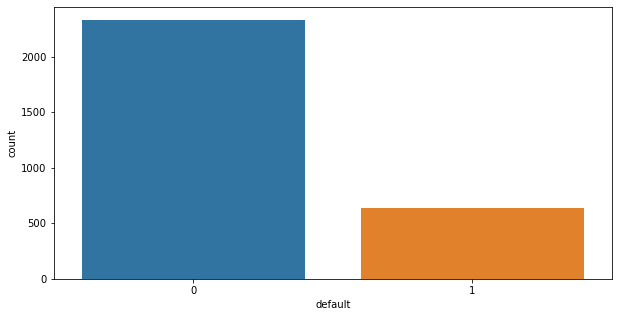

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'default', data = data_clean)

Berdasarkan visualisasi ini, seperti yang dapat kita lihat dari grafik di atas bahwa kedua kelas tersebut tidak proporsional dan artinya kami memiliki dataset yang tidak seimbang. Pada kelas 0 atau Non default memiliki data yang lebih banyak dibandingkan dengan kelas 1 atau Default kartu kredit.

<Figure size 720x360 with 0 Axes>

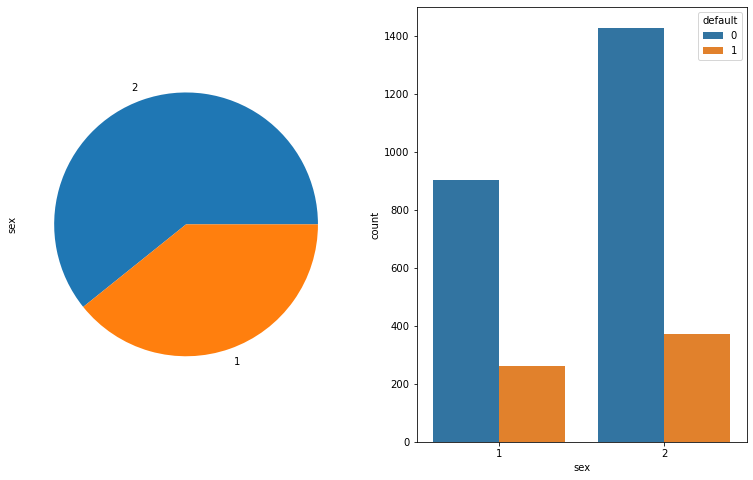

<Figure size 720x360 with 0 Axes>

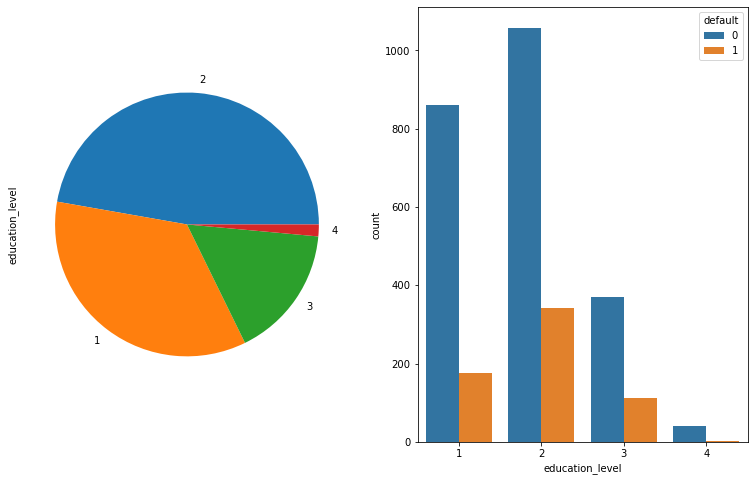

<Figure size 720x360 with 0 Axes>

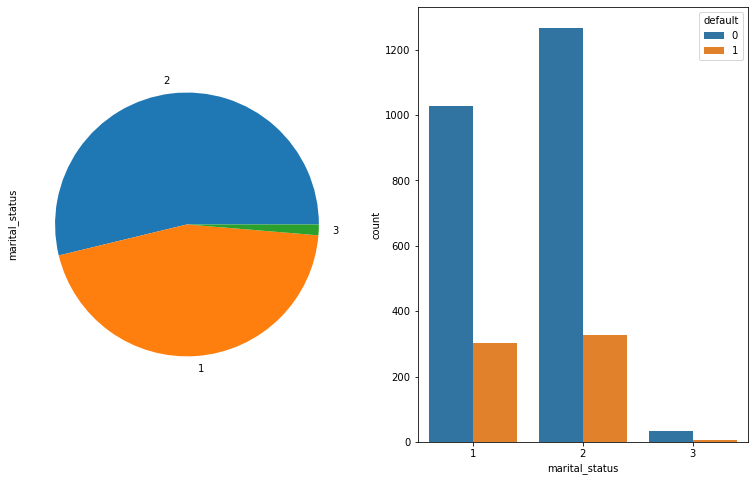

In [18]:
categorical_features = ['sex', 'education_level', 'marital_status']

df_cat = data_clean[categorical_features]
df_cat['default'] = data_clean['default']

for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  data_clean[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'default', data = df_cat)

Seperti yg dapat kita lihat informasi dari visualisasi di atas, jika dilihat berdasarkan jenis kelamin pria atau wanita yang memiliki kartu kredit default atau tidak, pada visualisasi pertama menunjukkan bahwa wanita memiliki jumlah terbanyak yang menggunakan kartu kredit dibandingkan dengan pria dan mendominasi pada kelas non default. Jika kita lihat berdasarkan tingkat pendidikannya pengguna kartu kredit terbanyak berada pada golongan tingkat pendidikan sarjana dengan kelas non default. Dan jika dilihat dari statusnya pada status lajang memiliki jumlah terbanyak baik dari kelas non default maupun kelas defaultnya.

<AxesSubplot:xlabel='default', ylabel='limit_balance'>

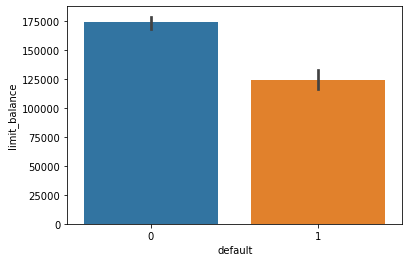

In [19]:
sns.barplot(x='default', y='limit_balance', data=data_clean)

Jumlah kredit yang diberikan termasuk kredit individu dan tambahan, pada kelas non default memiliki limit yang lebih banyak dibandingkan dengan kelas terdeteksi default dengan sekitaran jumlah limit sebesar 175000 dolar. 

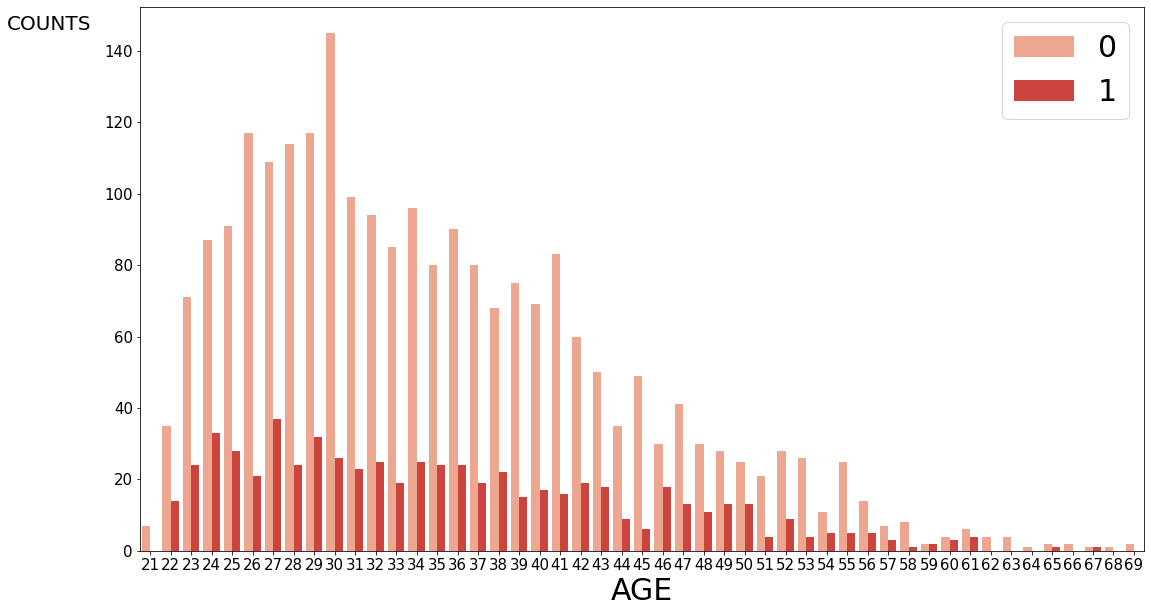

In [20]:
fig, axz = plt.subplots(figsize=(18,10))

axz = sns.countplot(x='age', hue='default', data=data_clean, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=40, size=20)
axz.set_xlabel('AGE', size=30)
axz.yaxis.set_label_coords(-0.09, 0.95)  # (x, y)
axz.legend(loc=1,fontsize=30);

axz.tick_params(labelsize=15)

Berdasarkan grafik di atas, informasi yang dapat saya tafsirkan adalah NonDefaults memiliki proporsi orang dengan umur 26-31 tahun yang lebih tinggi dibandingkan dengan umur lainnya

## VI. Split data into Train and Test

Pisahkan sampel sebelum split data untuk inferensi model nanti

In [21]:
inference = data_clean.sample(10, random_state=15)
data_clean = data_clean.drop(inference.index)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2954 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   limit_balance    2954 non-null   int64
 1   sex              2954 non-null   int64
 2   education_level  2954 non-null   int64
 3   marital_status   2954 non-null   int64
 4   age              2954 non-null   int64
 5   pay_1            2954 non-null   int64
 6   pay_2            2954 non-null   int64
 7   pay_3            2954 non-null   int64
 8   pay_4            2954 non-null   int64
 9   pay_5            2954 non-null   int64
 10  pay_6            2954 non-null   int64
 11  bill_amt_1       2954 non-null   int64
 12  bill_amt_2       2954 non-null   int64
 13  bill_amt_3       2954 non-null   int64
 14  bill_amt_4       2954 non-null   int64
 15  bill_amt_5       2954 non-null   int64
 16  bill_amt_6       2954 non-null   int64
 17  pay_amt_1        2954 non-null   int64
 18  pay_amt_

Menentukan antara fitur dan target. Terlihat dalam hal ini target berada di kolom default dan bisa kita atur sebagai variabel y, sedangkan selain kolom default kita bisa atur ke variabel x.

In [22]:
# define feature and target
X = data_clean.drop('default', axis=1)
y = data_clean['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [23]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(2067, 23)
(887, 23)
(2067,)
(887,)


Dapat kita lihat bentuk antara X dan Y dari setiap data latihan dan uji. Artinya distribusi datanya adalah 70% untuk data latihan dan 30% untuk data uji dari data yang dibersihkan (`data_clean`) sehingga data latihan memiliki bentuk 2067 baris dan data uji memiliki 887 baris.

In [24]:
# for EDA model creation, use dataframe stored in data_eda
data_eda = pd.concat([X_train, y_train], axis=1)

data_eda.shape

(2067, 24)

Menggabungkan kembali dari X dan Y yang telah kita pisahkan, tetapi yang digabungkan hanya untuk data latihan saja. Data untuk pengujian berbeda ketika data prapemrosesan berasal dari data latihan

## VII. EDA FOR MODELING

In [25]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 1329 to 822
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   limit_balance    2067 non-null   int64
 1   sex              2067 non-null   int64
 2   education_level  2067 non-null   int64
 3   marital_status   2067 non-null   int64
 4   age              2067 non-null   int64
 5   pay_1            2067 non-null   int64
 6   pay_2            2067 non-null   int64
 7   pay_3            2067 non-null   int64
 8   pay_4            2067 non-null   int64
 9   pay_5            2067 non-null   int64
 10  pay_6            2067 non-null   int64
 11  bill_amt_1       2067 non-null   int64
 12  bill_amt_2       2067 non-null   int64
 13  bill_amt_3       2067 non-null   int64
 14  bill_amt_4       2067 non-null   int64
 15  bill_amt_5       2067 non-null   int64
 16  bill_amt_6       2067 non-null   int64
 17  pay_amt_1        2067 non-null   int64
 18  pay_am

In [26]:
for i in data_eda.columns.tolist():
    print(f'num of unique label in {i}: ', len(data_eda[i].unique()))

num of unique label in limit_balance:  57
num of unique label in sex:  2
num of unique label in education_level:  4
num of unique label in marital_status:  3
num of unique label in age:  49
num of unique label in pay_1:  9
num of unique label in pay_2:  8
num of unique label in pay_3:  7
num of unique label in pay_4:  8
num of unique label in pay_5:  7
num of unique label in pay_6:  6
num of unique label in bill_amt_1:  1863
num of unique label in bill_amt_2:  1827
num of unique label in bill_amt_3:  1802
num of unique label in bill_amt_4:  1765
num of unique label in bill_amt_5:  1752
num of unique label in bill_amt_6:  1739
num of unique label in pay_amt_1:  1040
num of unique label in pay_amt_2:  1034
num of unique label in pay_amt_3:  973
num of unique label in pay_amt_4:  908
num of unique label in pay_amt_5:  894
num of unique label in pay_amt_6:  897
num of unique label in default:  2


Berdasarkan informasi di atas yg menjelaskan tentang banyaknya jumlah unique value dalam setiap feature, maka dapat kita golongkan feature-feature tersebut menjadi 2 golongan yang mana untuk golongan categorical feature untuk unique yg kurang dari 10 dan selebihnya masuk ke dalam numerik feature

In [27]:
# get name columns for data type numeric and categoric
num_col = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
            'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
cat_col = ['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default']

print('Numerical Columns   : ', data_eda[num_col].columns.tolist())
print('-'*50)
print('Categorical Columns : ', data_eda[cat_col].columns.tolist())

Numerical Columns   :  ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
--------------------------------------------------
Categorical Columns :  ['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default']


In [28]:
data_eda[num_col].shape

(2067, 14)

In [29]:
data_eda[cat_col].shape

(2067, 10)

Kita pisahkan terlebih dahulu untuk data numerik dengan data kategorik, untuk data numerik ada 14 kolom dan untuk data kategoris ada 10 kolom

### **categorical features**

Karena dataset ini telah diencoding, maka kami tidak perlu dilakukan encoding untuk data kategorikal

In [30]:
data_cat = data_eda[cat_col]
data_cat.head()

,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default
1329,1,1,2,0,0,0,0,0,0,0
1774,2,3,1,1,0,0,0,0,0,0
2449,1,2,2,3,2,3,2,2,2,1
380,2,3,1,1,2,0,0,0,0,1
2907,1,2,2,0,0,0,0,0,0,0


In [31]:
for i in data_cat.columns.tolist():
    print(i, '\n')
    print(data_cat[i].value_counts().head())
    print('-'*30)

sex 

2    1244
1     823
Name: sex, dtype: int64
------------------------------
education_level 

2    971
1    716
3    351
4     29
Name: education_level, dtype: int64
------------------------------
marital_status 

2    1089
1     953
3      25
Name: marital_status, dtype: int64
------------------------------
pay_1 

0    1609
1     243
2     181
3      22
4       4
Name: pay_1, dtype: int64
------------------------------
pay_2 

0    1767
2     268
3      17
4       6
7       3
Name: pay_2, dtype: int64
------------------------------
pay_3 

0    1793
2     246
3      12
4       6
6       4
Name: pay_3, dtype: int64
------------------------------
pay_4 

0    1815
2     222
3      12
7       6
4       5
Name: pay_4, dtype: int64
------------------------------
pay_5 

0    1844
2     191
3      15
4       7
7       7
Name: pay_5, dtype: int64
------------------------------
pay_6 

0    1832
2     209
3      15
7       6
6       3
Name: pay_6, dtype: int64
--------------------------

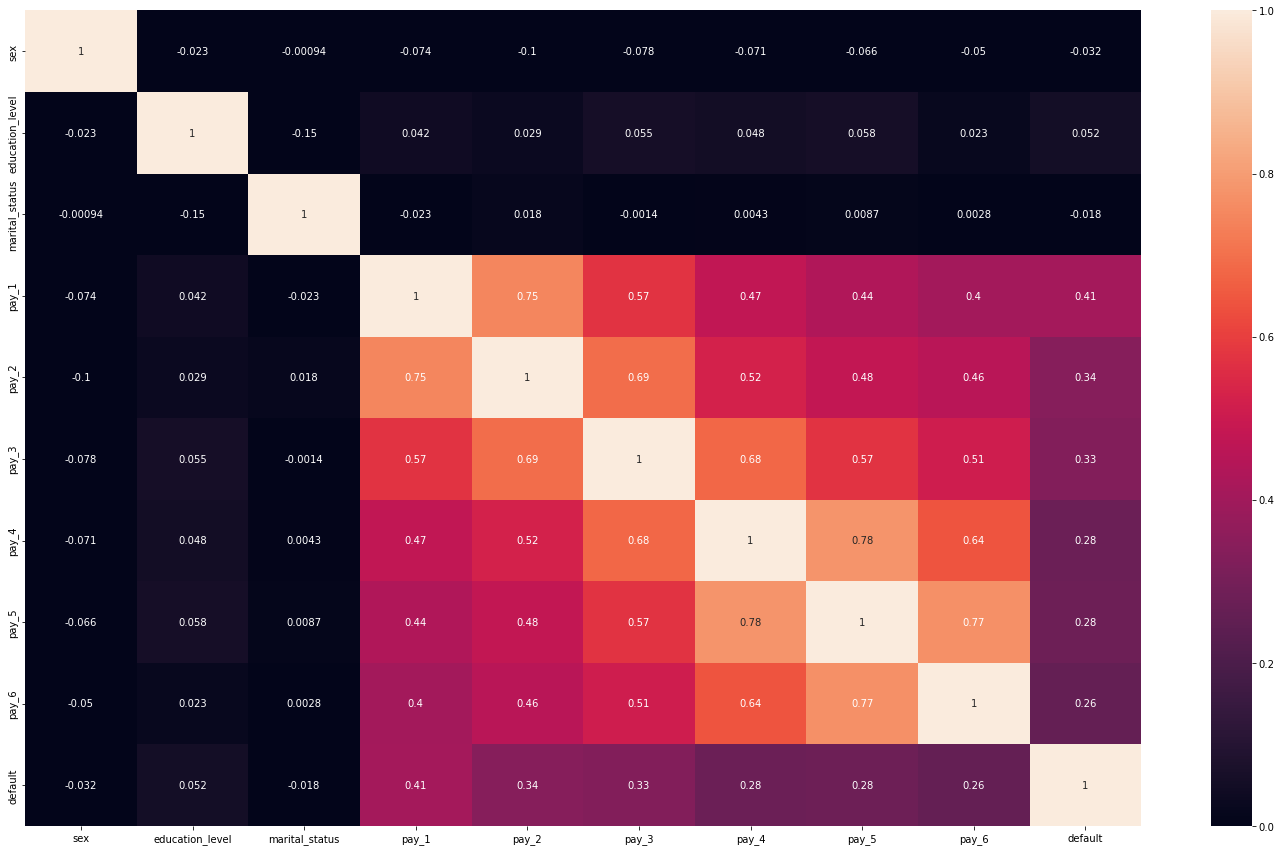

In [32]:
fig,ax = plt.subplots(figsize=[25,15])

corr = data_cat.corr()

ax = sns.heatmap(corr,annot=True, vmin=0, vmax=1)
plt.show()

Berdasarkan korelasi heatmap di atas, kami akan mengambil beberapa feature yang memiliki nilai korelasi tinggi terhadap targetnya yaitu default. Feature yang akan di ambil yaitu pay_1, pay_2, pay_3, pay_4, pay_5, dan pay_6 dikarenakan nilai korelasi terhadap target, keenam feature tersebut yang memiliki nilai tertinggi dibandingkan dengan feature lainnya.

In [33]:
cat_selection = ['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','default']
data_eda[cat_selection].head()

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default
1329,0,0,0,0,0,0,0
1774,1,0,0,0,0,0,0
2449,3,2,3,2,2,2,1
380,1,2,0,0,0,0,1
2907,0,0,0,0,0,0,0


### **numerical feature**

Setelah kami melakukan seleksi feature untuk data kategorikal, maka kami akan fokus pada preprocessing data numerik

In [34]:
data_eda[num_col].head()

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1329,490000,36,5310,2691,3367,-46,9285,-14,2711,3384,0,9331,0,2960
1774,200000,47,0,0,0,0,0,0,0,0,0,0,0,0
2449,50000,37,21153,23507,22838,20411,16016,15242,3000,0,57,2000,0,1000
380,20000,31,15043,14509,19092,19113,19483,14523,0,5166,2963,833,812,0
2907,160000,37,140266,133372,129619,116388,114022,111743,5019,5000,4156,4500,4500,4000


In [35]:
def plot_dist(data_eda, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

# histogram
    sns.histplot(data_eda[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(data_eda[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(data_eda[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()

# boxplot
    if data_eda[col].skew() >= 1 or data_eda[col].skew() <= -1 :
        sns.boxplot(y=data_eda[col], ax =  axes[1], whis=3)
        axes[1].set_title(f"Boxplot '{col}'")
    
        plt.show()
    else:
        sns.boxplot(y=data_eda[col], ax =  axes[1], whis=1.5)
        axes[1].set_title(f"Boxplot '{col}'")
    
        plt.show()
        
# skewness
    print(data_eda[col].name + ' Skewness: ' + str(data_eda[col].skew()))
    if -0.5 <= data_eda[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif data_eda[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif data_eda[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

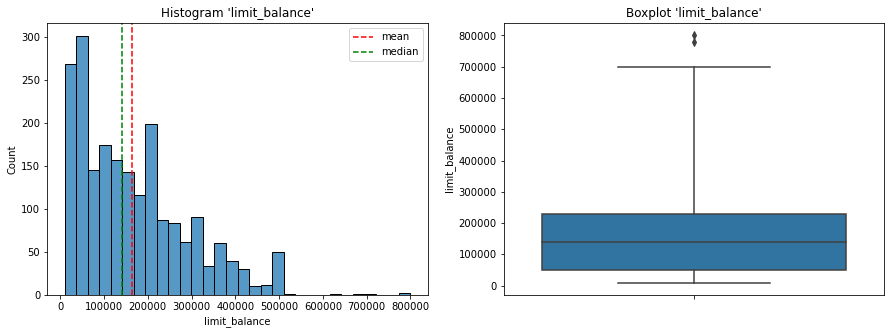

limit_balance Skewness: 1.0027784523663086
Columns 'limit_balance' right skewed


In [36]:
# checking the distribution of limit_balance
plot_dist(data_eda, 'limit_balance')

In [37]:
# outlier detection using IQR 
Q3 = data_eda['limit_balance'].quantile(.75)
Q1 = data_eda['limit_balance'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (3 * IQR)
lower = Q1 - (3 * IQR)

outlier = data_eda[(data_eda['limit_balance'] > upper) | (data_eda['limit_balance'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percent limit_balance of outlier: ', outlier.shape[0]/data_eda.shape[0] * 100, '%')

count of outlier:  2
percent limit_balance of outlier:  0.09675858732462506 %


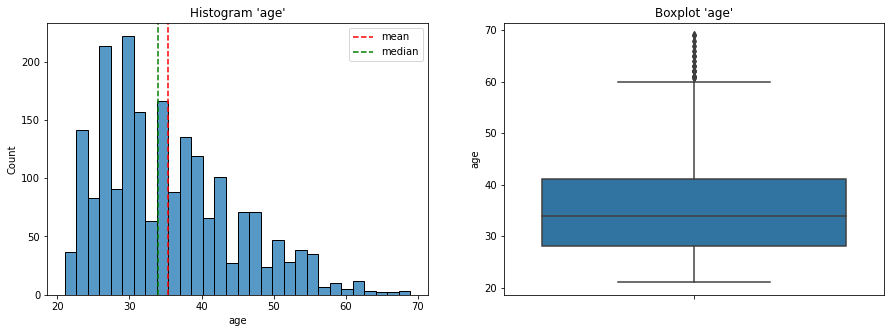

age Skewness: 0.7742111884353343
Columns 'age' right skewed


In [38]:
# checking the distribution of age
plot_dist(data_eda, 'age')

In [39]:
# outlier detection using IQR 
Q3 = data_eda['age'].quantile(.75)
Q1 = data_eda['age'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = data_eda[(data_eda['age'] > upper) | (data_eda['age'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percent age of outlier: ', outlier.shape[0]/data_eda.shape[0] * 100, '%')

count of outlier:  22
percent age of outlier:  1.0643444605708756 %


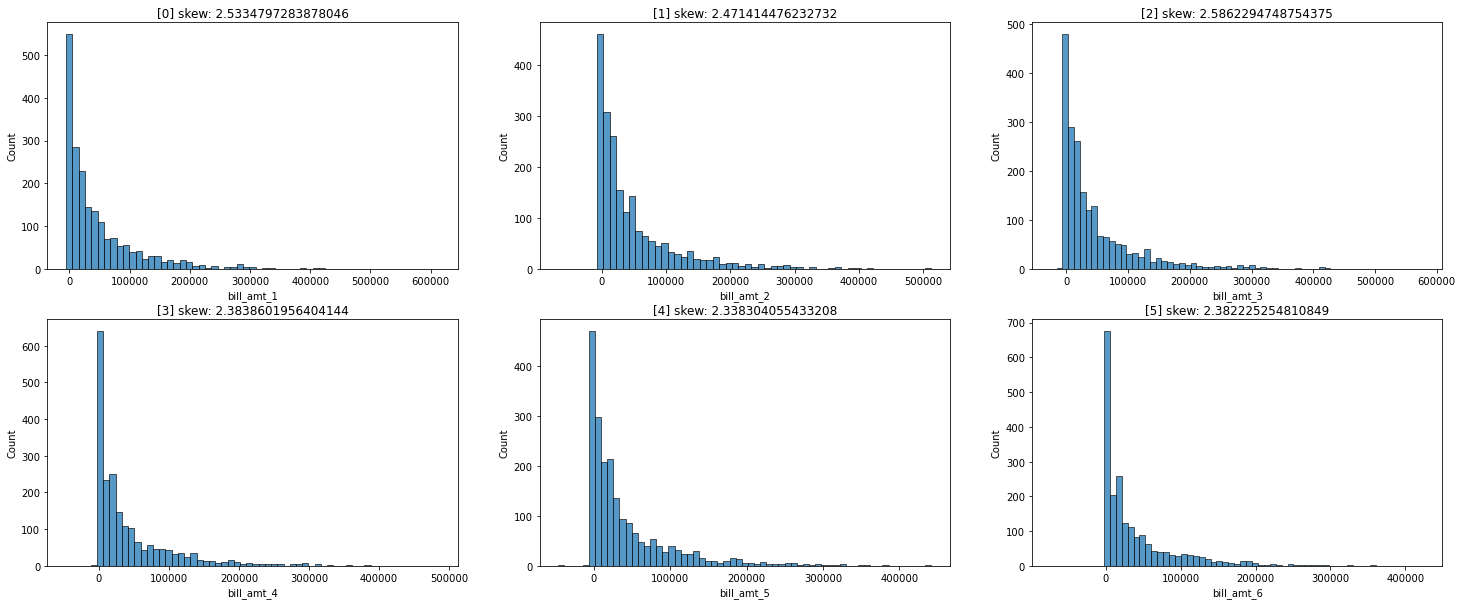

In [40]:
data_bill = data_eda[['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']]

fig, ax = plt.subplots(ncols=3,nrows=2, figsize=[25,10])
ax = ax.flatten()

for idx, col in enumerate(data_bill):
    sns.histplot(data_bill[col], ax=ax[idx])
    ax[idx].set_title(f'{[idx]} skew: {data_bill[col].skew()}')

In [41]:
def outlier_analysis(data_bill,col):
  skewness = data_bill[col].skew()
  if skewness>=-0.5 or skewness<=0.5:
    upper = data_bill[col].mean() + 3*data_bill[col].std()
    lower = data_bill[col].mean() - 3*data_bill[col].std()
  else:
    Q1 = data_bill[col].quantile(0.25)
    Q3 = data_bill[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + (3*IQR)
    lower = Q3 - (3*IQR)
  
  no_outliers = data_bill[(data_bill[col]>=lower) & (data_bill[col]<=upper)]
  outliers = data_bill[(data_bill[col]<lower) | (data_bill[col]>upper)]
  print('percentage outlier from',i,':',outliers.shape[0]/data_eda.shape[0] * 100, '%')
  return outliers,no_outliers, upper, lower

for i in list(data_bill.columns):
  outlier_analysis(data_eda[num_col],i)

percentage outlier from bill_amt_1 : 2.6124818577648767 %
percentage outlier from bill_amt_2 : 2.467343976777939 %
percentage outlier from bill_amt_3 : 2.467343976777939 %
percentage outlier from bill_amt_4 : 2.515723270440252 %
percentage outlier from bill_amt_5 : 2.418964683115626 %
percentage outlier from bill_amt_6 : 2.2254475084663765 %


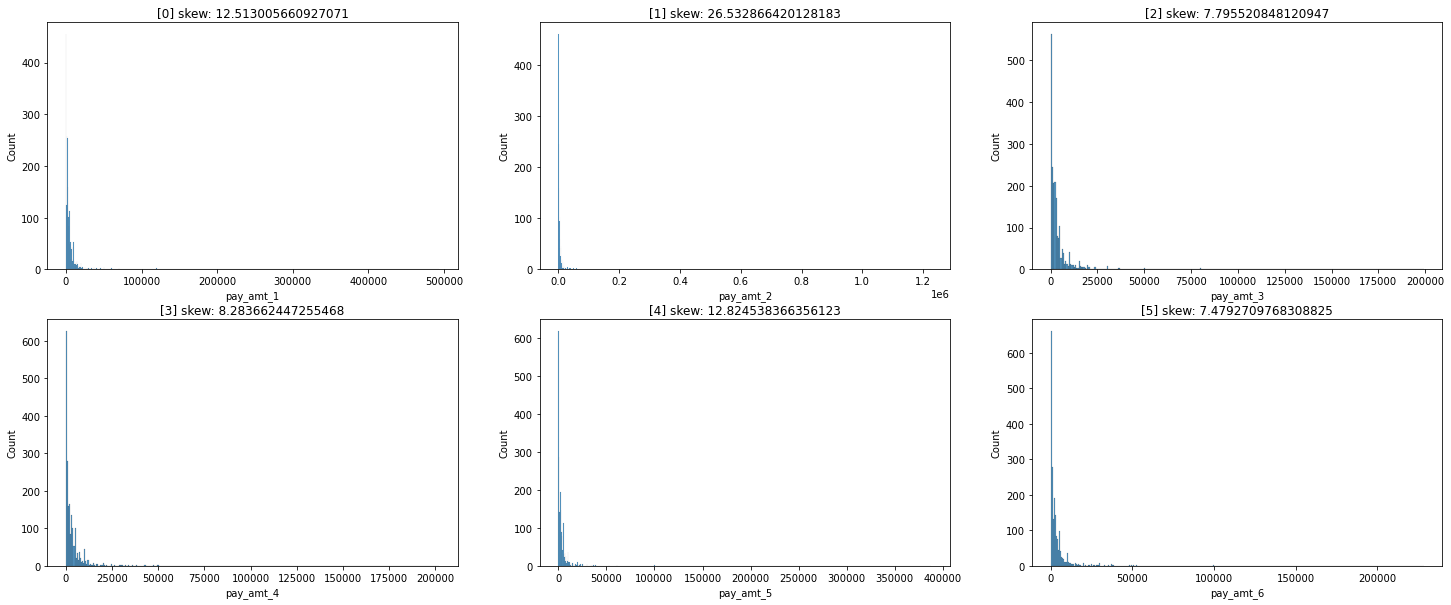

In [42]:
data_pay = data_eda[['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]

fig, ax = plt.subplots(ncols=3,nrows=2, figsize=[25,10])
ax = ax.flatten()

for idx, col in enumerate(data_pay):
    sns.histplot(data_pay[col], ax=ax[idx])
    ax[idx].set_title(f'{[idx]} skew: {data_pay[col].skew()}')

In [43]:
def outlier_analysis(data_pay,col):
  skewness = data_pay[col].skew()
  if skewness>=-0.5 or skewness<=0.5:
    upper = data_pay[col].mean() + 3*data_pay[col].std()
    lower = data_pay[col].mean() - 3*data_pay[col].std()
  else:
    Q1 = data_pay[col].quantile(0.25)
    Q3 = data_pay[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + (3*IQR)
    lower = Q3 - (3*IQR)
  
  no_outliers = data_pay[(data_pay[col]>=lower) & (data_pay[col]<=upper)]
  outliers = data_pay[(data_pay[col]<lower) | (data_pay[col]>upper)]
  print('percentage outlier from',i,':',outliers.shape[0]/data_eda.shape[0] * 100, '%')
  return outliers,no_outliers, upper, lower

for i in list(data_pay.columns):
  outlier_analysis(data_eda[num_col],i)

percentage outlier from pay_amt_1 : 1.1127237542331883 %
percentage outlier from pay_amt_2 : 0.5805515239477503 %
percentage outlier from pay_amt_3 : 1.4513788098693758 %
percentage outlier from pay_amt_4 : 1.644895984518626 %
percentage outlier from pay_amt_5 : 1.209482341557813 %
percentage outlier from pay_amt_6 : 1.6932752781809386 %


In [44]:
# capping outlier
wins = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['limit_balance'])

data_eda_cleaned = wins.fit_transform(data_eda)

Berdasarkan analisis di atas dapat dilihat bahwa untuk penanganan data outlier numerik hanya dilakukan pada fitur limit_balance dengan menggunakan metode IQR capping dengan fold 3 dan untuk fitur lainnya tidak dilakukan penanganan outlier seperti age column, pay column dan bill column. Kolom pay maupun bill tidak ditangani dengan outlier meskipun outlier terdeteksi karena kolom menjelaskan tentang jumlah tagihan dan jumlah bayaran oleh pelanggan sehingga menurut kami tidak perlu dilakukan penanganan outlier tersebut. Untuk kolom age tidak dilakukan handling outliers dikarenakan tidak sesuai apabila dilakukan capping, misal umur 80 dicapping ke dalam umur 60 yang berarti merubah pelanggan berumur 80 menjadi umur 60, hal ini agak aneh dilakukan, sehingga pada kolom age tidak dilakukan capping. Sehingga untuk capping outlier hanya pada kolom limit_balance

In [45]:
num_out = ['limit_balance']
# Compare before and after outlier handling
print('before handling: \n', data_eda[num_out].describe()) 
print('after handling: \n', data_eda_cleaned[num_out].describe())

before handling: 
        limit_balance
count    2067.000000
mean   164958.877600
std    124706.182283
min     10000.000000
25%     50000.000000
50%    140000.000000
75%    230000.000000
max    800000.000000
after handling: 
        limit_balance
count    2067.000000
mean   164939.525883
std    124610.268411
min     10000.000000
25%     50000.000000
50%    140000.000000
75%    230000.000000
max    770000.000000


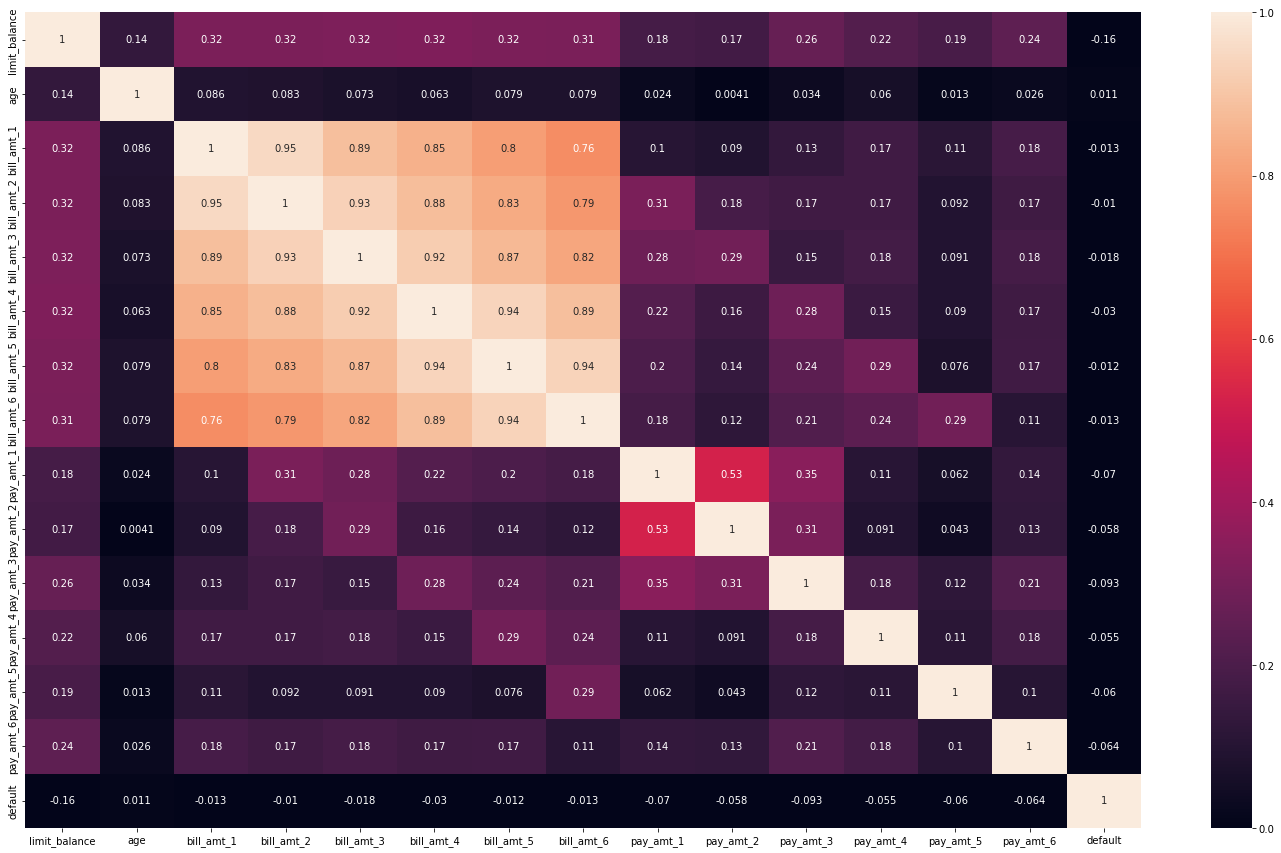

In [46]:
fig,ax = plt.subplots(figsize=[25,15])

corr = data_eda_cleaned[num_col + ['default']].corr()

ax = sns.heatmap(corr,annot=True, vmin=0, vmax=1)
plt.show()

Selanjutnya dapat kita lakukan feature selection, berdasarkan heatmap korelasi di atas maka dapat kita pilih feature yang memiliki korelasi tertinggi terhadap target. Untuk feature limit balance memiliki angka koefisien korelasi yang tinggi dibandingkan dengan yang lainnya sehingga kita hanya akan menggunakan feature limit balance untuk modelling

In [47]:
num_selection = ['limit_balance']
data_eda[num_selection].head()

,limit_balance
1329,490000
1774,200000
2449,50000
380,20000
2907,160000


**combine Numerical and Categorical data after processed**

In [48]:
data_eda_cleaned = pd.concat([data_eda_cleaned[num_selection].reset_index(drop=True), data_eda_cleaned[cat_selection].reset_index(drop=True)], axis=1)
data_eda_cleaned.head()

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default
0,490000.0,0,0,0,0,0,0,0
1,200000.0,1,0,0,0,0,0,0
2,50000.0,3,2,3,2,2,2,1
3,20000.0,1,2,0,0,0,0,1
4,160000.0,0,0,0,0,0,0,0


Sebelum dilakukan scaling pada data numerik, kita akan mengecek terlebih dahulu apakah data tersebut nyocoknya menggunakan standarscaler ataupun minmax scaler. Dapat kita lihat dari nilai skewnya, jika nilai skew dari numerik tersebut kurang dari 0,5 ataupun lebih dari -0,5 maka scaling tersebut menggunakan standarscaler, akan tetapi jika nilai skew dari numerik tersebut lebih dari 0,5 dan -0,5 maka tepatnya menggunakan MinMax Scaler

In [49]:
norm = 0
nonorm = 0
for col in data_eda_cleaned[['limit_balance']]:
  if data_eda_cleaned[col].skew() >=-0.5 and data_eda_cleaned[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [50]:
# numerical scaling

num_col = ['limit_balance']
scaler = MinMaxScaler()

data_eda_cleaned[num_col] = pd.DataFrame(scaler.fit_transform(data_eda_cleaned[num_col]))
data_eda_cleaned.head()

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default
0,0.631579,0,0,0,0,0,0,0
1,0.250000,1,0,0,0,0,0,0
2,0.052632,3,2,3,2,2,2,1
3,0.013158,1,2,0,0,0,0,1
4,0.197368,0,0,0,0,0,0,0


1. Outlier handling on numeric data with IQR capping method or winsorizer
2. Feature Selection -> 'limit_balance', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default'
3. Scaling on numerical features

## VIII. Data Preprocessing

1. Outlier handling on numeric data with IQR capping method or winsorizer
2. Feature Selection -> 'limit_balance', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default'
3. Scaling on numerical features

Selanjutnya kita akan melakukan testing modelling pada data test yang telah kita pisahkan di awal.

In [51]:
testing = pd.concat([X_test, y_test], axis=1)
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 1528 to 1379
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   limit_balance    887 non-null    int64
 1   sex              887 non-null    int64
 2   education_level  887 non-null    int64
 3   marital_status   887 non-null    int64
 4   age              887 non-null    int64
 5   pay_1            887 non-null    int64
 6   pay_2            887 non-null    int64
 7   pay_3            887 non-null    int64
 8   pay_4            887 non-null    int64
 9   pay_5            887 non-null    int64
 10  pay_6            887 non-null    int64
 11  bill_amt_1       887 non-null    int64
 12  bill_amt_2       887 non-null    int64
 13  bill_amt_3       887 non-null    int64
 14  bill_amt_4       887 non-null    int64
 15  bill_amt_5       887 non-null    int64
 16  bill_amt_6       887 non-null    int64
 17  pay_amt_1        887 non-null    int64
 18  pay_am

In [52]:
# capping outlier
testing = wins.transform(testing)
testing.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
1528,50000,1,3,2,46,0,0,0,2,0,0,390,170,780,390,780,40418,170,1000,0,780,40418,3170,0
1358,90000,2,2,2,23,2,3,3,2,2,2,82623,86621,84369,82117,84395,85739,5900,0,0,3600,2900,3500,1
2952,20000,1,2,1,24,0,0,0,0,0,0,10085,11416,12520,12714,13059,13193,1500,1600,700,700,500,1000,1
2461,80000,1,2,3,40,0,0,0,0,0,0,72185,76854,72408,72832,46473,50329,12660,4573,3500,2000,5000,2000,0
1039,110000,2,2,2,24,0,0,0,2,0,0,6470,8610,15123,9761,9717,8046,2654,7230,0,463,393,151,0


In [53]:
testing_cleaned = testing[['limit_balance', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default']]

testing_cleaned.head()

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default
1528,50000,0,0,0,2,0,0,0
1358,90000,2,3,3,2,2,2,1
2952,20000,0,0,0,0,0,0,1
2461,80000,0,0,0,0,0,0,0
1039,110000,0,0,0,2,0,0,0


In [54]:
# numerical scalling
testing_cleaned[num_col] = scaler.transform(testing_cleaned[num_col])
testing_cleaned.head()

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default
1528,0.052632,0,0,0,2,0,0,0
1358,0.105263,2,3,3,2,2,2,1
2952,0.013158,0,0,0,0,0,0,1
2461,0.092105,0,0,0,0,0,0,0
1039,0.131579,0,0,0,2,0,0,0


In [55]:
X_train = data_eda_cleaned.drop('default',axis=1).copy()
y_train = data_eda_cleaned['default']

X_test = testing_cleaned.drop('default',axis=1).copy()
y_test = testing_cleaned['default']

## IX. Model Definition, Training, & hyperparameter tuning

dalam pemodelan ini, beberapa model akan dibuat seperti model regresi logistik, model SVM, model decisiontree, model randomforest, model KNN, model naive bayes, model AdaBoost, dan Model XgBoost Classifier.

In [56]:
# Defining Logistic Regression Model
log_model = LogisticRegression()
# Defining SVM Classifier Model
svm_model = SVC()
# Defining Decision Tree Classifier Model
dt_model = DecisionTreeClassifier()
# Defining Random Forest Classifier Model
rf_model = RandomForestClassifier()
# Defining KNN Classifier Model
knn_model = KNeighborsClassifier()
# Defining naive bayes Model
nb_model = GaussianNB()
# Defining AdaBoost Classifier Model
ada_model = AdaBoostClassifier()
# Defining XGBoost Classifier Model
Xg_model = XGBClassifier()

# training model
for model in [log_model,svm_model,dt_model,rf_model,knn_model,nb_model,ada_model, Xg_model]:
    model.fit(X_train,y_train)

In [57]:
# checking cross validation score
cv_log_model = cross_val_score(log_model, X_train, y_train, cv=3, scoring="accuracy")
cv_svm_model = cross_val_score(svm_model, X_train, y_train, cv=3, scoring="accuracy")
cv_dt_model = cross_val_score(dt_model, X_train, y_train, cv=3, scoring="accuracy")
cv_rf_model = cross_val_score(rf_model, X_train, y_train, cv=3, scoring="accuracy")
cv_knn_model = cross_val_score(knn_model, X_train, y_train, cv=3, scoring="accuracy")
cv_nb_model = cross_val_score(nb_model, X_train, y_train, cv=3, scoring="accuracy")
cv_ada_model = cross_val_score(ada_model, X_train, y_train, cv=3, scoring="accuracy")
cv_Xg_model = cross_val_score(Xg_model, X_train, y_train, cv=3, scoring="accuracy")
cvh=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_ada_model,cv_Xg_model],['log_model','svm_model','dt_model','rf_model','knn_model','nb_model','ada_model','Xg_model']):
    print(name)
    print('Accuracy - All - Cross Validation  : ', cv)
    print('Accuracy - Mean - Cross Validation : ', cv.mean())
    print('Accuracy - Std - Cross Validation  : ', cv.std())
    print('Accuracy - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)

log_model
Accuracy - All - Cross Validation  :  [0.82583454 0.83744557 0.82583454]
Accuracy - Mean - Cross Validation :  0.8297048863086599
Accuracy - Std - Cross Validation  :  0.005473492258821823
Accuracy - Range of Test-Set       :  0.824231394049838 - 0.8351783785674818
--------------------------------------------------
svm_model
Accuracy - All - Cross Validation  :  [0.82583454 0.83309144 0.82148041]
Accuracy - Mean - Cross Validation :  0.8268021286889211
Accuracy - Std - Cross Validation  :  0.004789305726469093
Accuracy - Range of Test-Set       :  0.822012822962452 - 0.8315914344153902
--------------------------------------------------
dt_model
Accuracy - All - Cross Validation  :  [0.79245283 0.80986938 0.80551524]
Accuracy - Mean - Cross Validation :  0.8026124818577648
Accuracy - Std - Cross Validation  :  0.007400608873138982
Accuracy - Range of Test-Set       :  0.7952118729846258 - 0.8100130907309038
--------------------------------------------------
rf_model
Accuracy -

In [58]:
mean = []
std = []
for i in [cv_log_model, cv_svm_model, cv_dt_model, cv_rf_model, cv_knn_model, cv_nb_model, cv_ada_model, cv_Xg_model]:
    mean.append(i.mean())
    std.append(i.std())

model = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes' ,'AdaBoost', 'XgBoost']
bestmodel = pd.DataFrame(model)
bestmodel['mean']=np.round(mean, 4)
bestmodel['std']=np.round(std, 4)
bestmodel.rename(columns={0:'Model'}, inplace=True)

bestmodel.sort_values(by= 'mean' , ascending = False).reset_index(drop=True)

,Model,mean,std
0,AdaBoost,0.8336,0.0079
1,Logistic Regression,0.8297,0.0055
2,SVM,0.8268,0.0048
3,XgBoost,0.8162,0.0038
4,KNN,0.8133,0.0121
5,Random Forest,0.8045,0.0083
6,Naive Bayes,0.8036,0.0083
7,Decision Tree,0.8026,0.0074


Jika dibandingkan berdasarkan mean cross validation, rata-rata tertinggi berada pada adaBoost model akan tetapi jika kita tinjau kembali dengan standardeviasinya yang mana semakin kecil nilai standardeviasinya maka rentang antar data tersebut tidak terlalu berbeda jauh sehingga dapat kita simpulkan bahwa SVM model merupakan model terbaik dalam prediksi data ini karena pada SVM model memiliki nilai standardeviasi terkecil setelah XgBoost akan tetapi nilai rata-rata dari crossvalidationnya tidak terlalu jauh dengan rata-rata cross validation tertinggi pada model adaBoost dengan sebesar nilai mean 0.8268 dengan standardeviasi 0.0048

In [59]:
# defining hyperparameters for tuning
params = [{
            'C': [0.1, 1, 10, 100, 1000], 
            'gamma': ['scale', 'auto'],
            'kernel': ['linear','poly','rbf','sigmoid'],
            'max_iter': [-1,1000,10000,100000]} 
    ]

# Training using grid search
grid_search = GridSearchCV(svm_model, params, cv=3,
                           scoring='f1',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'max_iter': [-1, 1000, 10000, 100000]}],
             return_train_score=True, scoring='f1')

In [60]:
pd.DataFrame(grid_search.cv_results_).shape

(160, 20)

ada 160 kombinasi

In [61]:
# Displaying best hyperparameters
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 10000}

In [62]:
grid_search.best_score_

0.5148525312514844

In [63]:
# retrieving the best model
svm_gridcv_best = grid_search.best_estimator_

## X. MODEL EVALUATION

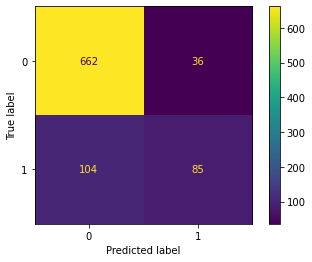

In [64]:
# Evaluating the default adaBoost model
# creating prediction data
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

# Plotting confusion matrix 
cm0 = confusion_matrix(y_test, y_pred_test, labels=svm_model.classes_) 

ConfusionMatrixDisplay(confusion_matrix=cm0,display_labels=svm_model.classes_).plot()

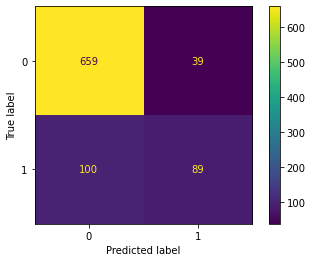

In [65]:
# Evaluating the default svm model with bestparams
# creating prediction data
svm_y_pred_train = svm_gridcv_best.predict(X_train)
svm_y_pred_test = svm_gridcv_best.predict(X_test)

# Plotting confusion matrix 
cm = confusion_matrix(y_test, svm_y_pred_test, labels=svm_gridcv_best.classes_) 

ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_gridcv_best.classes_).plot()

Dengan membandingkan hasil model prediktor sebelum (model baseline) dan sesudah penyetelan hyperparameter pada SVM model, ditemukan bahwa hampir tidak ada perbedaan yang mencolok pada hasil kedua model. Model yang dihasilkan tampaknya sulit memprediksi pembayaran True Default. Ini mungkin terjadi karena ketidakseimbangan nilai pembayaran default dalam kumpulan data.

Hal ini dapat diasumsikan secara default gridsearchCV adalah cara terbaik untuk menemukan parameter yang memberikan akurasi terbaik. Namun, metrik yang dipilih untuk kasus penggunaan default kartu kredit ini bukanlah akurasi melainkan Recall, Precision, dan F1. Jadi default gridsearchCV tidak akan berfungsi. Namun, scikit-learn menyediakan opsi (opsi pencetak & reparasi, yang dapat dikonfigurasi untuk metrik tertentu seperti 'F1'). tetapi, ini pun tidak berhasil. Mengapa?

Ini karena, ketika gridsearchCV dikonfigurasi (menggunakan pencetak & reparasi) untuk mencari 'Recall', 'Precision', atau 'F1', itu hanya terlihat pada 'rata-rata keseluruhan' dan bukan 'F1' berdasarkan kelas. Sehingga perlu dilakukan balancing data trainingnya agar model dapat berjalan sesuai dengan tujuan yang kita inginkan.

In [66]:
# Evaluating the model
print("Training")
print(classification_report(y_train,svm_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,svm_y_pred_test))


Training
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1626
           1       0.68      0.44      0.53       441

    accuracy                           0.84      2067
   macro avg       0.77      0.69      0.72      2067
weighted avg       0.82      0.84      0.82      2067



Test
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       698
           1       0.70      0.47      0.56       189

    accuracy                           0.84       887
   macro avg       0.78      0.71      0.73       887
weighted avg       0.83      0.84      0.83       887



Data yang dianalisis adalah data ketidakseimbangan, jadi kita akan melihat nilainya berdasarkan presisi atau recall dari laporan_klasifikasi ini. Berdasarkan penjelasan di awal bahwa untuk kolom default dengan kelas 0 berarti `non default` dan pada kelas 1 disebut `default` atau terdapat tunggakan. Berdasarkan laporan_klasifikasi ini, kita dapat fokus pada masing-masing jumlah dukungan terendah atau golongan minoritas sehingga kita dapat fokus pada kelas 1 atau `default` dan fokus pada nilai recall karena urgensi dalam kasus kartu kredit default ini, kita harus meminimalkan kesalahan dalam prediksi yaitu jika model memprediksi nondefault yang seharusnya dalam kenyataan atau data riil pengguna tersebut default credit card. Prediksi tersebut harus diminimalisir agar tidak terjadi kesalahan yang dapat menyebabkan kerugian besar dalam perusahaan ini. Untuk mengurangi prediksi tersebut, nilai evaluasi recall harus mendekati 1 agar tidak terjadi kesalahan fatal seperti yang telah disebutkan sebelumnya. Pada laporan klasifikasi di atas diketahui nilai recall pada model SVM dengan hyperparameter terpilih sebesar 47% artinya model kurang baik dalam memprediksi kelas 1 yang disebabkan pada data ini imbalance dan kelas 1 merupakan kelas minoritas

## XI. MODEL INFERENCE

In [67]:
inference.reset_index(drop=True, inplace=True)
inference.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
0,140000,2,2,1,48,0,0,0,0,0,0,41241,42548,44552,46503,48418,49277,1996,3000,3000,3000,1790,1965,0
1,50000,1,2,1,32,1,0,0,0,0,0,-11545,-1935,7321,2850,6340,3110,10000,10000,7867,6340,3000,2218,0
2,10000,2,1,2,24,0,0,0,0,0,0,6709,7895,8751,8925,9111,9360,1300,1146,320,330,400,1000,0
3,210000,2,2,1,37,0,0,0,0,0,0,22908,32513,6192,2885,8419,2810,32513,9,8,8444,3118,0,1
4,70000,2,1,2,25,0,0,2,2,2,0,37017,39980,39063,41592,39101,40310,3900,0,3500,0,2000,1813,1


In [68]:
# capping outlier
inference = wins.transform(inference)
inference.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
0,140000,2,2,1,48,0,0,0,0,0,0,41241,42548,44552,46503,48418,49277,1996,3000,3000,3000,1790,1965,0
1,50000,1,2,1,32,1,0,0,0,0,0,-11545,-1935,7321,2850,6340,3110,10000,10000,7867,6340,3000,2218,0
2,10000,2,1,2,24,0,0,0,0,0,0,6709,7895,8751,8925,9111,9360,1300,1146,320,330,400,1000,0
3,210000,2,2,1,37,0,0,0,0,0,0,22908,32513,6192,2885,8419,2810,32513,9,8,8444,3118,0,1
4,70000,2,1,2,25,0,0,2,2,2,0,37017,39980,39063,41592,39101,40310,3900,0,3500,0,2000,1813,1


In [69]:
inference_cleaned = inference[['limit_balance', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default']]

inference_cleaned.head()

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default
0,140000,0,0,0,0,0,0,0
1,50000,1,0,0,0,0,0,0
2,10000,0,0,0,0,0,0,0
3,210000,0,0,0,0,0,0,1
4,70000,0,0,2,2,2,0,1


In [70]:
# numerical scalling
inference_cleaned[num_col] = scaler.transform(inference_cleaned[num_col])
inference_cleaned

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default
0,0.171053,0,0,0,0,0,0,0
1,0.052632,1,0,0,0,0,0,0
2,0.000000,0,0,0,0,0,0,0
3,0.263158,0,0,0,0,0,0,1
4,0.078947,0,0,2,2,2,0,1
5,0.250000,2,0,2,2,2,0,1
6,0.381579,0,0,0,0,0,0,0
7,0.513158,0,0,0,0,0,0,0
8,0.092105,0,0,0,0,0,0,1
9,0.171053,0,0,0,0,0,2,1


In [71]:
inference_cleaned.shape

(10, 8)

In [72]:
X_inf = inference_cleaned.drop('default',axis=1).copy()

In [76]:
y_pred_inf = svm_gridcv_best.predict(X_inf)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['SVM Prediction'])
y_pred_inf_df

,SVM Prediction
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [77]:
# Joining inference data with predictions
pd.concat([inference_cleaned,y_pred_inf_df], axis=1)

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default,SVM Prediction
0,0.171053,0,0,0,0,0,0,0,0
1,0.052632,1,0,0,0,0,0,0,0
2,0.000000,0,0,0,0,0,0,0,0
3,0.263158,0,0,0,0,0,0,1,0
4,0.078947,0,0,2,2,2,0,1,0
5,0.250000,2,0,2,2,2,0,1,1
6,0.381579,0,0,0,0,0,0,0,0
7,0.513158,0,0,0,0,0,0,0,0
8,0.092105,0,0,0,0,0,0,1,0
9,0.171053,0,0,0,0,0,2,1,0


Pada tahapan model inference, model yang digunakan pada tahapan ini adalah model svm yang sudah dilakukan hyperparameter tuning, dan ketika dimasukan data baru model dapat berjalan dengan baik sehingga dapat melakukan prediksi apakah pengguna tersebut masuk ke kelas default atau nondefault. Hasil inferensi model menunjukkan bahwa model akhir lebih sulit memprediksi nilai pembayaran default True/1.

---

## KESIMPULAN

Kesimpulan dari analisis yang telah dilakukan adalah sebagai berikut:

Berdasarkan analisis yang telah dilakukan, saya berhasil membuat model machine learning untuk memprediksi probabilitas pemegang kartu kredit akan gagal bayar atau tidak.
Menurut heatmap korelasi, feature yang memiliki nilai korelasi tertinggi terhadap menentukan seorang pemegang kartu kredit akan wanprestasi atau tidak adalah saldo limit kartu kredit dan status cicilannya hanya dalam 1 bulan (pay_1 hingga pay_6).
Berdasarkan analisis dari cross validation, dapat disimpulkan bahwa svm model berusaha mencari margin (jarak antara garis dan support vector) yang “terbaik” yang memisahkan kelas-kelas dan hal ini mengurangi resiko kesalahan pada data.
Model prediktor yang digunakan untuk memprediksi kemungkinan tersebut adalah Model svm dengan nilai akurasi sebesar 0,83.

Saya juga telah membuat model svm dengan hyperparameter tuning, hal ini dapat meningkatkan nilai akurasi menjadi 0,84 akan tetapi model tersebut tetap memiliki nilai recall 47% yang masih kecil model dalam mempredict default yang ingin mengurangi kesalahan model mempredict nondefault yang nyatanya pengguna tersebut merupakan default card credit. Hal ini dapat disebabkan oleh kelas target yang tidak seimbang. Kelas NonDefault memiliki proporsi 79% dari total data, sedangkan kelas Default hanya 21% dari total data.

Saran yang dapat saya berikan untuk proyek atau analisis tentang topik tersebut adalah:
Resampling data karena kelas target tidak seimbang. Metode yang dapat digunakan adalah oversampling, undersampling, dan juga SMOTE.
Buat prediksi menggunakan data yang tidak diskalakan juga untuk melihat perbedaan yang lebih mendetail. Memperkenalkan fitur baru ke model, atau dengan menyetel algoritma pemodelan yang berbeda.
Perangkat yang digunakan setidaknya menggunakan SSD untuk mempercepat komputasi model.

## Conceptual Problems

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

Fungsi dari parameter criterion pada Decision Tree yaitu untuk memisahkan atribut atau menentukan metode mana yang akan kita pilih saat melakukan operasi pemisahan. Macam-macam dari criterion yaitu information_gain, gain_ratio, gini_index, akurasi, dan least_square. 
Gini Impurity adalah probabilitas salah mengklasifikasikan elemen yang dipilih secara acak dalam kumpulan data jika diberi label secara acak sesuai dengan distribusi kelas dalam kumpulan data. Saat melatih pohon keputusan, pemisahan terbaik dipilih dengan memaksimalkan Keuntungan Gini, yang dihitung dengan mengurangkan ketidakmurnian berbobot cabang dari ketidakmurnian asli.
Singkatnya gini_index yaitu criterion ini mengukur ketidaksetaraan antara distribusi karakteristik label. Pemisahan pada atribut yang dipilih menghasilkan pengurangan indeks gini rata-rata dari himpunan bagian yang dihasilkan

2. Apakah fungsi dari pruning pada Tree model?

Pruning adalah proses menghilangkan koneksi berat dari jaringan untuk mempercepat inferensi dan mengurangi ukuran penyimpanan model. Decision Tree dan jaringan saraf, secara umum, terlalu diparameterisasi. Pruning jaringan memerlukan penghapusan parameter yang tidak dibutuhkan dari jaringan yang terlalu berparameter.

Pruning sebagian besar berfungsi sebagai pencarian arsitektur di dalam tree atau jaringan. Faktanya, karena pruning berfungsi sebagai regularizer, sebuah model akan sering menggeneralisasi sedikit lebih baik pada tingkat ketersebaran yang rendah. Model yang dipangkas akan cocok dengan baseline di level yang lebih tinggi. Jika Anda mendorongnya terlalu jauh, model akan mulai menggeneralisasi lebih buruk daripada baseline, tetapi dengan performa yang lebih baik.

Tujuan pruning adalah untuk menghapus bagian dari model klasifikasi yang menjelaskan variasi acak dalam sampel pelatihan daripada karakteristik domain yang sebenarnya. Ini membuat model lebih mudah dipahami oleh pengguna dan, mungkin, lebih akurat pada data baru yang tidak digunakan untuk melatih pengklasifikasi. Pendekatan yang efektif untuk membedakan bagian dari classifier yang disebabkan efek acak dari bagian yang menggambarkan struktur yang signifikan diperlukan untuk pruning. Ada berbagai metode pruning yang tercantum dalam artikel ini yang digunakan dalam kedua strategi tersebut.


3. Bagaimana cara memilih K yang optimal pada KNN?

Cara terbaik untuk mendapatkan K optimal adalah melalui cross validation. Tapi ada satu langkah tambahan yang diperlukan, yaitu menyesuaikan model dan memilih k menggunakan set data yang berbeda (pas dalam kasus KNN hanya mengingat semua titik data). Jika Anda menyesuaikan model dan memilih hyperparameter pada set yang sama, kesalahan akan meremehkan kesalahan generalisasi yang sebenarnya, yaitu kesalahan yang akan Anda lihat pada data baru yang diambil dari distribusi yang sama. Ini berarti pengklasifikasi dapat bekerja lebih buruk pada data baru daripada yang Anda harapkan. Cross validation adalah cara memilih k yang mencoba meminimalkan kesalahan generalisasi.

a.) Sebenarnya **tidak ada metode statistik yang ditentukan** untuk menemukan nilai K terbaik;
b.) Selanjutnya kita input nilai K berdasarkan **asumsi pribadi**;
c.) Hati-hati! menggunakan nilai **kecil** dari nilai K mengarah ke **batas keputusan yang tidak stabil**;
d.) Nilai K yang substansial lebih baik untuk klasifikasi karena mengarah pada kelancaran batas keputusan;
e.) Buat plot antara tingkat kesalahan dan K yang menunjukkan nilai dalam rentang yang ditentukan dalam data kita. Kemudian pilih nilai K 
    berdasarkan tingkat kesalahan minimum.

4. Jelaskan apa yang kalian ketahui tentang Cross Validation!

Cross validation adalah metode statistik yang digunakan untuk memperkirakan kinerja (atau akurasi) model pembelajaran mesin. Ini digunakan untuk melindungi dari overfitting dalam model prediktif, terutama dalam kasus di mana jumlah data mungkin terbatas. Dalam Cross validation, Anda membuat jumlah lipatan (atau partisi) data yang tetap, menjalankan analisis pada setiap lipatan, lalu menghitung rata-rata perkiraan kesalahan keseluruhan.

5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

- Akurasi adalah jumlah titik data yang diprediksi dengan benar dari semua titik data. 

- Presisi adalah rasio pengamatan positif yang diprediksi dengan benar terhadap total pengamatan positif yang diprediksi. 

- Recall adalah rasio observasi positif yang diprediksi dengan benar terhadap semua observasi di kelas aktual 

- F1 Score adalah rata-rata tertimbang dari Precision dan Recall.